# **Assignment 2**
##### Filip Sjövall

In [1]:
import numpy as np
import scipy as sp
import math 
import matplotlib as mp

## Task 1
We consider the Graham-Schmidt process of orthogonalizing a set of vectors by concurrent subtraction of their reflections

In [2]:
class Orthogonalization:
    #
    # def __init__(self,args):
        # self.arg1 = arg[0] ... etc
    #
    def gramschmidt(A):
        m,n = np.shape(A)
        Q   = np.zeros([m,m])
        R   = np.zeros([m,n])
        
        v      = A[:,0]
        Q[:,0] = v/np.linalg.norm(v,2)
        R[0,0] = np.linalg.norm(v,2)
        
        for j in range(0,n):
            v = A[:,j]
            if j>0:
                for i in range(0,j):
                    R[i,j] = np.dot(Q[:,i],A[:,j])
                    v     -= R[i,j]*Q[:,i]  
            R[j,j] = np.linalg.norm(v,2) 
            Q[:,j] = v/R[j,j]
        return Q,R
    ####################
    def householder(A):
        m,n = np.shape(A)
        Q   = np.eye(m)
        R   = A
        for k in range(0,n):
            x     = R[k:m,k]
            e1    = np.zeros(np.shape(x))
            e1[0] = 1.0
            v     = np.sign(x[0])*np.linalg.norm(x,2)*e1 + x
            v     = v/np.linalg.norm(v,2)
            R[k:m,k:n] = R[k:m,k:n] - 2.0 * np.outer(v, np.dot(v , R[k:m,k:n]))
            H     = np.eye(m)
            H[k:m,k:m] = H[k:m,k:m] - 2*np.outer(v,v)
            Q     = np.matmul(Q,H)
        return Q,R # Q,R
    ####################
    def rotation(A):
        m,n = np.shape(A)
        Q   = np.eye(m)
        R   = A
        for col in range(0,n-1):
            for row in range(m-1,0+col,-1):
                H = np.eye(m)
                c =  R[col,col] / ( ( R[col,col]**2 + R[row,col]**2) **(1/2) )
                s = -R[row,col] / ( ( R[col,col]**2 + R[row,col]**2) **(1/2) )
    
                H[[col, row], [col, row]] = c
                H[row, col] = s
                H[col, row] = -s
                
                R = np.dot(H, R)
                Q = np.dot(Q, np.transpose(H))
        return Q,R
    # check orthogonality
    # def det(Q)
        # Q = gramschmidt(A)
        # return det(Q)

## Task 2
 1. Test if 2-norm is one
 2. How big is the deviation from identity matrix in terms of the 2-norm
 3. Eigenvalues of $Q^TQ$
 4. Compute the determinant (of what)

In [23]:
A1 = np.random.rand(3,3)
A3 = A1
print("\n A \n", A1)
O = Orthogonalization
Q,R = O.gramschmidt(np.copy(A1))
print("Q^T Q: \n",np.matmul(Q,np.transpose(Q)))
print("Q: \n",Q)
print("R: \n",R)
print("\n QR: \n",np.matmul(Q,R))
print("A: \n",A1)
print("--------------------------")
A2 =  np.matmul(Q,R)
diff = np.subtract( A1 ,A2)
print("Difference A-QR \n", diff  )
print("Q^TQ",np.matmul(np.transpose(Q),Q))
np.linalg.det(np.matmul(np.transpose(Q),Q))


 A 
 [[0.24835007 0.59823807 0.84677241]
 [0.34498314 0.57840909 0.88133351]
 [0.61920614 0.65959732 0.27687591]]
Q^T Q: 
 [[ 1.00000000e+00 -4.69474056e-17 -1.37750837e-15]
 [-4.69474056e-17  1.00000000e+00  9.05264464e-16]
 [-1.37750837e-15  9.05264464e-16  1.00000000e+00]]
Q: 
 [[ 0.33066133  0.78919158 -0.51753236]
 [ 0.45932172  0.34447079  0.81875725]
 [ 0.8244311  -0.50844521 -0.24858966]]
R: 
 [[0.75107082 1.0072826  0.91307562]
 [0.         0.33600038 0.83108307]
 [0.         0.         0.21453759]]

 QR: 
 [[0.24835007 0.59823807 0.84677241]
 [0.34498314 0.57840909 0.88133351]
 [0.61920614 0.65959732 0.27687591]]
A: 
 [[0.24835007 0.59823807 0.84677241]
 [0.34498314 0.57840909 0.88133351]
 [0.61920614 0.65959732 0.27687591]]
--------------------------
Difference A-QR 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.11022302e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
Q^TQ [[ 1.00000000e+00 -8.96949468e-16  2.28102425e-15]
 [-8.969

1.0

In [24]:
O = Orthogonalization

nlist = (1,10,100)#,1000) #,10000)


for n in nlist:
    m = n + 2
    A = np.random.rand(m,n)
    Q,R = O.gramschmidt(np.copy(A))
    print("m,n",m,n,"\n 2- norm: ", np.linalg.norm(Q,2))
    u,v =np.linalg.eig(np.matmul(np.transpose(Q),Q))
    print("lambdas: ", u)
    print("determinant", np.linalg.det(np.matmul(np.transpose(Q),Q)))

m,n 3 1 
 2- norm:  0.9999999999999999
lambdas:  [1. 0. 0.]
determinant 0.0
m,n 12 10 
 2- norm:  1.0
lambdas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
determinant 0.0
m,n 102 100 
 2- norm:  1.0000000000000195
lambdas:  [1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+1.31280649e-16j 1.-1.31280649e-16j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00

If m != n we have either an under- or overdetermined system? This is reflected by the determinant whose value is 0. To verify that we require a square matrix(A) to obtain a nonzero determinant we check for $m=n:$

In [25]:
for n in nlist:
    m = n 
    A = np.random.rand(m,n)
    Q,R = O.gramschmidt(np.copy(A))
    print("m,n",m,n,"\n 2- norm: ", np.linalg.norm(Q,2))
    u,v =np.linalg.eig(np.matmul(np.transpose(Q),Q))
    print("lambdas: ", u)
    print("determinant", np.linalg.det(np.matmul(np.transpose(Q),Q)))

m,n 1 1 
 2- norm:  1.0
lambdas:  [1.]
determinant 1.0
m,n 10 10 
 2- norm:  1.0000000000000007
lambdas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
determinant 0.9999999999999997
m,n 100 100 
 2- norm:  1.0000000000000264
lambdas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
determinant 1.0000000000000049


## Task 3
Repeat the test in 2 using numpy's own qr-factorization.

In [26]:
for n in nlist:
    m = n + 2
    A = np.random.rand(m,n)
    Q,R = np.linalg.qr(A)
    print("m,n",m,n,"\n 2- norm: ", np.linalg.norm(Q,2))
    u,v =np.linalg.eig(np.matmul(np.transpose(Q),Q))
    print("lambdas: ", u)
    print("determinant", np.linalg.det(np.matmul(np.transpose(Q),Q)))

m,n 3 1 
 2- norm:  1.0
lambdas:  [1.]
determinant 1.0
m,n 12 10 
 2- norm:  1.0000000000000004
lambdas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
determinant 1.0000000000000013
m,n 102 100 
 2- norm:  1.0000000000000002
lambdas:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
determinant 0.9999999999999953


Interestingly the determinant is now nonzero and the execution time is __significanlty__ reduced $15.3s \rightarrow 1.76s$. 

## Task 4
QR via Householder, this factorization uses the reflector $P = I - v^T v$ where $v$ is the vector between the vector to be reflected and the line of recletion. This reflection is chosen such that the reflected vectors form the factorized matrix. My implementation computes $Q$ in a crude way $Q = H_1H_2...H_n$ which takes a lot of matrix multiplications.

In [27]:
nlist = (3,4)#
O = Orthogonalization
for n in nlist:
    m = n + 2
    A = np.random.rand(m,n)
    print("A: \n", A)
    Q,R = O.householder(np.copy(A))
    print("Householder R: \n", R)
    print("Orthogonal? \n", np.matmul(np.transpose(Q),Q) )
    print("det \n", np.linalg.det(np.matmul(np.transpose(Q),Q)) )
    ##################################################################
    ###################### Numpy implementation ######################
    ##################################################################
    Q2,R2 = np.linalg.qr(np.copy(A))
    print("Householder R2: \n", R2)
    print("Orthogonal? \n", np.matmul(np.transpose(Q2),Q2) )
    print("det \n", np.linalg.det(np.matmul(np.transpose(Q2),Q2)) )

A: 
 [[0.07879834 0.87753122 0.02421192]
 [0.69593691 0.62202099 0.23229193]
 [0.02424927 0.36208111 0.54990702]
 [0.01141871 0.03906271 0.24702522]
 [0.44629049 0.97729747 0.73084376]]
Householder R: 
 [[-8.30921760e-01 -1.14020384e+00 -6.08832962e-01]
 [ 1.11022302e-16  9.71928664e-01  4.05951254e-01]
 [ 6.93889390e-18 -5.55111512e-17 -6.45463827e-01]
 [ 1.73472348e-18 -1.73472348e-18  0.00000000e+00]
 [ 1.11022302e-16  1.73472348e-18  0.00000000e+00]]
Orthogonal? 
 [[ 1.00000000e+00  4.31348580e-17  3.58105740e-17  2.80149305e-18
   2.76403698e-17]
 [ 4.31348580e-17  1.00000000e+00 -3.70300794e-17  1.80773414e-17
  -3.69947931e-17]
 [ 3.58105740e-17 -3.70300794e-17  1.00000000e+00 -1.98455293e-16
  -2.15031889e-16]
 [ 2.80149305e-18  1.80773414e-17 -1.98455293e-16  1.00000000e+00
  -1.33897144e-16]
 [ 2.76403698e-17 -3.69947931e-17 -2.15031889e-16 -1.33897144e-16
   1.00000000e+00]]
det 
 0.9999999999999992
Householder R2: 
 [[-0.83092176 -1.14020384 -0.60883296]
 [ 0.          0.97

## Task 5
1. __Rotations__. A rotation $Q$ of the matrix $A$ preserves the egienvalues and eigenvectors of $A$. Furthermore $Q$ should be a square orthogonal matrix.
2. Multiplications with orthogonal square matrices are either a reflection or a rotation.
3. The idea here will be to rotate column vectors of $A$ onto the basis vectors such that they form an upper triangular matrix. A rotation in the $1-2$ plane (around the other axises up to m) can be described by
\begin{equation}
Q_z = 
\begin{bmatrix}
\text{cos} \theta & -\text{sin} \theta & 0 & ... \\
\text{sin} \theta &  \text{cos} \theta & 0 & ...\\
0          &             & 1 & ...\\
& & & \ddots & \\
& & & & 1
\end{bmatrix}
\end{equation}
so the angle $\theta$ should be chosen to as the angle between a vector $v$ and e.g. the axis of its first basis vector $\theta = \text{atan}\frac{v_2}{v_1} $. This is repeated for all lower triangular elements of $A$.
4. This is very much similar to the method of triangularization described in https://en.wikipedia.org/wiki/Givens_rotation .
5. 
6. The implementation is can be found as the method "rotation" above.
7. The operation count for one Householder iteration $A_{k:m,k:n} = A_{k:m,k:n} - 2v_k(v_k^T A_{k:m,k:n})$ is approximately $4(m-k)(n-k)$ then for $m,n \rightarrow \infty$ yields $\sum_{k=1}^n 4(m-k)(n-k) = 4(mn^2 + (m+n)\frac{n(1-n)}{2} + \frac{m(n+1)(2n+1)}{6} \approx 4mn^2  + \frac{2n^3}{3}  - (m+n)\frac{n^2}{2} = 2mn^2 - \frac{2n^3}{3}$.
The qr-factorization using Givens rotations could be implemented as matrix-vectors operations on the submatrices $A_{k,k:n}$ and $A_{k + row - 1,k:n}$ where 4 scalar multiplications and 2 matrix additions would be performed (related to the cos/sin-terms in H). Let $j$ denote row, we then get in total $\sum_{k=1}^n \sum_{j=2}^{m-k} 6(n-k+1) \approx \sum_{k=1}^n 6(m-k)(n-k+1) \approx 3n^2 (m - \frac{n}{3})$. So QR using Givens would require roughly $50\%$ more operations.

In [28]:
###################
## A quick check ## 
###################
O = Orthogonalization
m = 4
n = 4
A = np.random.rand(m,n)

Q,R = O.rotation(np.copy(A))
print("A \n", A)
print("Rot R: \n", R)
print("Q \n", Q)
print("Q^T Q \n", np.matmul(np.transpose(Q),Q))


A 
 [[0.56763821 0.94312911 0.27603517 0.64804594]
 [0.74954196 0.37271554 0.67750904 0.66381566]
 [0.47095661 0.2614387  0.70231394 0.50260773]
 [0.79432875 0.8169396  0.66313939 0.76498851]]
Rot R: 
 [[ 1.31787122e+00  1.20403793e+00  1.15490771e+00  1.29737420e+00]
 [ 8.12052095e-17  5.60751777e-01 -2.71672544e-01  9.42808936e-02]
 [ 6.26881616e-17  2.40250537e-18  2.46160213e-01  6.57014478e-02]
 [-4.40309878e-17 -4.69223407e-18 -1.38777878e-17  4.52918214e-02]]
Q 
 [[ 0.43072358  0.75705794 -0.06393783  0.48708564]
 [ 0.56875205 -0.55654483 -0.53032547  0.29246172]
 [ 0.35736163 -0.30109268  0.84414786  0.26277414]
 [ 0.60273624  0.16267858  0.04562057 -0.77984836]]
Q^T Q 
 [[ 1.00000000e+00  2.77555756e-17 -5.55111512e-17  0.00000000e+00]
 [ 2.77555756e-17  1.00000000e+00 -5.55111512e-17  0.00000000e+00]
 [-5.55111512e-17 -5.55111512e-17  1.00000000e+00 -8.32667268e-17]
 [ 0.00000000e+00  0.00000000e+00 -8.32667268e-17  1.00000000e+00]]


## Task 6


1. An image of a three-striped flag should be approximated with a matrix of rank $r=3$ to represent three distinct RBG-values.
2. - 
3. The 2-norm of the difference is very small and allclose returns "True"
4. - 
5. By varying the tolerance it is quite easily seen that the topmost around 10 of the largest singular values contain almost all the information as although the image is blurry with only these SD's it is still easy to distinguish the original image.

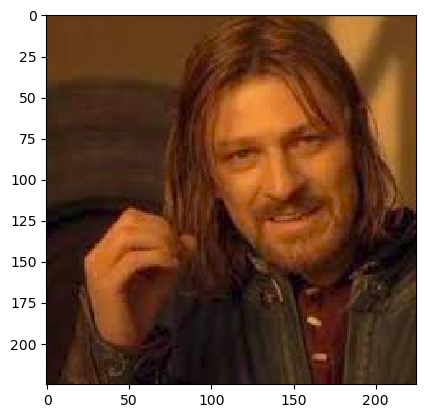

In [3]:
from matplotlib import image, pyplot
import PIL

an_image = image.imread("/home/filip/Downloads/boromiiir.png")
pyplot.imshow(an_image)




(225, 225)


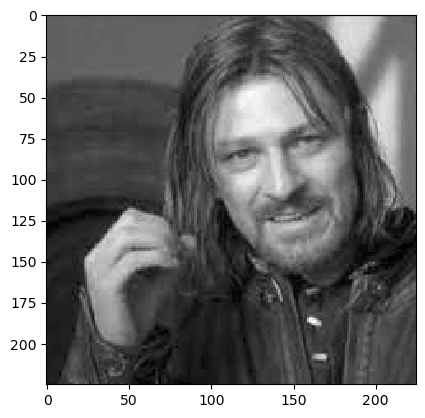

In [4]:

rgb_weights = [0.2989, 0.5870, 0.1140]

grayscale_image = np.dot(an_image[...,:3], rgb_weights)

print(np.shape(grayscale_image))

pyplot.imshow(grayscale_image, cmap=pyplot.get_cmap("gray"))


Difference:  1.2537203691594691e-13
True
221
Max(s) 8.215423770171599


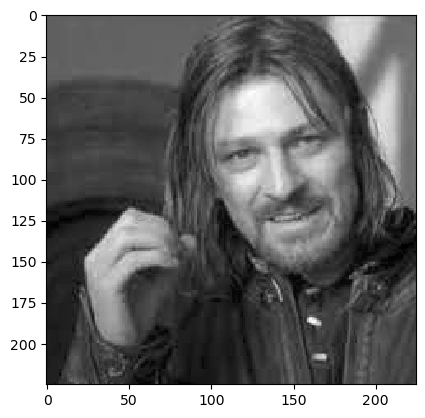

In [8]:
u,s,v = np.linalg.svd(grayscale_image,full_matrices=False)
recon = np.dot(u * s, v)
diff  = np.linalg.norm(grayscale_image - recon,2)


print("Difference: ",diff)
# or 
print(np.allclose(grayscale_image,recon))

s[abs(s)<0.001] = 0

print(len(s[s!=0]) )

recon = np.dot(u * s, v)

pyplot.imshow(recon,cmap=pyplot.get_cmap("gray"))

print("Max(s)",max(s[s<10]))